In [86]:
sim_path = '/data/REPOSITORY/e12Gals/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.003840/ahf_200/h148.cosmo50PLK.3072g3HbwK1BH.003840'
import pynbody
sim = pynbody.load(sim_path)
sim.physical_units()
h = sim.halos(halo_numbers='v1')

In [87]:
halo = h[1]

run halo_mergers.py to generate pickle files


In [88]:
halo.properties['halo_number']

1

In [ ]:
[-128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128  -64  -64 -128
 -128 -128 -128 -128 -128 -128 -128 -128 -128 -128 -256 -128  -96  -32
 -128 -128 -256]


In [6]:
import pickle
#load each simulation's merger history
sims = ['cptmarvel','elektra','storm','rogue','h148','h229','h242','h329']
#sims = ['cptmarvel','elektra','storm','rogue']

all_merger_histories = {}
for sim in sims:
    with open(f'../DataFiles/{sim}.merger_history.pkl', 'rb') as f:
        history_df = pickle.load(f)
        print(history_df.keys())
        all_merger_histories[sim] = history_df
        
        
# # save to file
# with open('all_merger_histories.pkl', 'wb') as f:
#     pickle.dump(all_merger_histories, f)
#         

dict_keys([4096, 3968, 3840, 3712, 3584, 3456, 3328, 3200, 3072, 2944, 2816, 2688, 2560, 2432, 2304, 2176, 2048, 1920, 1792, 1664, 1536, 1408, 1280, 1152, 896, 768, 640])
dict_keys([4096, 4032, 3936, 3840, 3744, 3648, 3552, 3456, 3360, 3264, 3168, 3072, 2976, 2880, 2784, 2688, 2592, 2496, 2400, 2304, 2208, 2112, 2016, 1920, 1824, 1728, 1632, 1536, 1440, 1344, 1248, 1152, 1056, 960, 864, 768, 672, 640, 512, 384])
dict_keys([4096, 4032, 3936, 3840, 3744, 3648, 3552, 3456, 3360, 3264, 3168, 3072, 2976, 2880, 2784, 2688, 2592, 2496, 2400, 2304, 2208, 2112, 2016, 1920, 1824, 1728, 1632, 1536, 1440, 1344, 1248, 1152, 1056, 960, 864, 768, 672, 576, 480, 384, 288, 192])
dict_keys([4096, 4032, 3936, 3840, 3744, 3648, 3552, 3456, 3360, 3264, 3168, 3072, 2976, 2880, 2784, 2688, 2592, 2496, 2400, 2304, 2208, 2112, 2016, 1920, 1824, 1728, 1632, 1536, 1440, 1344, 1248, 1152, 1056, 960, 864, 768, 672, 576, 480, 384, 288, 192])
dict_keys([4096, 3968, 3840, 3712, 3584, 3456, 3328, 3200, 3072, 2944, 281

In [7]:
#print timesteps of each simulation
for sim in all_merger_histories.keys():
    print(f'{sim}: {sorted(all_merger_histories[sim].keys())}')
    steps = sorted(all_merger_histories[sim].keys())
    # for halo in all_merger_histories[sim][steps[0]].keys():
    #     print(f'\t\t{all_merger_histories[sim][steps[0]][halo]['merger_info']['merger_ratio']}')
    #     break
    # break



cptmarvel: [640, 768, 896, 1152, 1280, 1408, 1536, 1664, 1792, 1920, 2048, 2176, 2304, 2432, 2560, 2688, 2816, 2944, 3072, 3200, 3328, 3456, 3584, 3712, 3840, 3968, 4096]
elektra: [384, 512, 640, 672, 768, 864, 960, 1056, 1152, 1248, 1344, 1440, 1536, 1632, 1728, 1824, 1920, 2016, 2112, 2208, 2304, 2400, 2496, 2592, 2688, 2784, 2880, 2976, 3072, 3168, 3264, 3360, 3456, 3552, 3648, 3744, 3840, 3936, 4032, 4096]
storm: [192, 288, 384, 480, 576, 672, 768, 864, 960, 1056, 1152, 1248, 1344, 1440, 1536, 1632, 1728, 1824, 1920, 2016, 2112, 2208, 2304, 2400, 2496, 2592, 2688, 2784, 2880, 2976, 3072, 3168, 3264, 3360, 3456, 3552, 3648, 3744, 3840, 3936, 4032, 4096]
rogue: [192, 288, 384, 480, 576, 672, 768, 864, 960, 1056, 1152, 1248, 1344, 1440, 1536, 1632, 1728, 1824, 1920, 2016, 2112, 2208, 2304, 2400, 2496, 2592, 2688, 2784, 2880, 2976, 3072, 3168, 3264, 3360, 3456, 3552, 3648, 3744, 3840, 3936, 4032, 4096]
h148: [512, 640, 768, 896, 1024, 1152, 1280, 1408, 1536, 1920, 2048, 2176, 2304, 243

In [ ]:
for halo in history_df[4096].keys():
    # if history_df[4096][halo]['merger_info']['has_merger']:
    print(halo)
    if history_df[4096][halo]['merger_info']['has_merger']:
        main_prog = history_df[4096][halo]['merger_info']['main_progenitor']
        stellar_progenitors = history_df[4096][halo]['merger_info']['progenitors']
        dark_progenitors = history_df[4096][halo]['merger_info']['dark_progenitors']
        print(f'merger ratio: {history_df[4096][halo]["merger_info"]["merger_ratio"]}, stellar merger ratio: {history_df[4096][halo]["merger_info"]["merger_ratio_stellar_only"]}')
        print(f'Main progenitor: {main_prog}, \nStellar progenitors: {stellar_progenitors}, \nDark progenitors: {dark_progenitors}')

In [354]:
for halo in history_df[4096].keys():
    # if history_df[4096][halo]['merger_info']['has_merger']:
    halo_0 = halo
    print(f'Halo {halo} at z=0')
    for step in history_df.keys():        
        time = history_df[step][halo]['final_state']['time']
        ratio = history_df[step][halo]['merger_info']['merger_ratio']
        snap = history_df[step][halo]['final_state']['snapshot']
        
        halo = history_df[step][halo]['merger_info']['main_progenitor']
        print(halo)


Halo 1 at z=0
1
1
Halo 2 at z=0
2
2
Halo 3 at z=0
3
3
Halo 5 at z=0
5
5
Halo 6 at z=0
6
6
Halo 7 at z=0
7
7
Halo 10 at z=0
10
10
Halo 11 at z=0
11
11
Halo 13 at z=0
13
13
Halo 14 at z=0
14
14
Halo 20 at z=0
19
19
Halo 23 at z=0
23
22
Halo 25 at z=0
25
24
Halo 26 at z=0
26
25
Halo 30 at z=0
29
29
Halo 38 at z=0
38
38
Halo 39 at z=0
40
44
Halo 40 at z=0
41
40
Halo 44 at z=0
44
45
Halo 50 at z=0
53
53
Halo 58 at z=0
57
59
Halo 63 at z=0
63
65
Halo 69 at z=0
72
74
Halo 174 at z=0
173
172
Halo 426 at z=0
468
493


In [211]:
# Save to file using pickle


In [ ]:
sim_path = '/data/REPOSITORY/dwarf_volumes/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/ahf_200/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096'
#sim_path = '/data/REPOSITORY/dwarf_volumes/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.003968/ahf_200/cptmarvel.cosmo25cmb.4096g5HbwK1BH.003968'

# Get merger history for all snapshots
history_df = analyze_merger_history(sim_path)

# Save to file
history_df.to_csv('merger_history.csv', index=False)

# Print summary statistics
print("\nMerger Statistics:")
print(f"Total halos analyzed: {len(history_df)}")
print(f"Halos with mergers: {len(history_df[history_df['has_merger']])}")
print(f"Average merger ratio: {history_df['merger_ratio'].mean():.2f}")

/data/REPOSITORY/dwarf_volumes/cptmarvel.cosmo25cmb.4096g5HbwK1BH
/data/REPOSITORY/dwarf_volumes/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/ahf_200/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096


In [9]:
'/data/REPOSITORY/dwarf_volumes/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/ahf_200/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096'

'/data/REPOSITORY/dwarf_volumes/cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/ahf_200/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096'

In [362]:
history_df[4096][1]

{'final_state': {'mvir': np.float64(15526563030.471205),
  'm_star': np.float64(54387631.2577039),
  'snapshot': 4096,
  'time': 13.731118532104414,
  'n_star': np.int64(205466)},
 'merger_info': {'has_merger': True,
  'dark_merger': False,
  'merger_ratio': np.float64(88.64116764876067),
  'merger_ratio_stellar_only': np.float64(1041.7163951261484),
  'main_progenitor': 1,
  'main_progenitor_mvir': np.float64(11259600000.0),
  'minor_stellar_mvir': np.float64(10808700.0),
  'total_minor_mvir': np.float64(127024500.0),
  'progenitors': [1, 397],
  'dark_progenitors': [110, 301, 405, 491, 805, 832, 911, 945],
  'rejected_minor_progenitors': [],
  'rejected_dark_progenitors': [],
  'contribution_threshold': 50.0},
 'progenitor_details': {'stellar': {1: {'matching_particles': 2624633,
    'percent_in_final': 96.49595340487164,
    'percent_of_progenitor': 96.91930754857721,
    'Mvir': np.float64(11259600000.0),
    'n_star': np.int64(203050),
    'npart': np.int64(2708060),
    'total_pa

In [245]:
history_df[1792+128][3]

{'final_state': {'mvir': np.float64(5736290739.146346),
  'm_star': np.float64(3834294.9876653515),
  'snapshot': 1920,
  'time': 6.442307881078892,
  'n_star': np.int64(14351)},
 'merger_info': {'has_merger': True,
  'merger_ratio': np.float64(5.737772998454403),
  'merger_ratio_stellar_only': np.float64(5.969085667121387),
  'merger_ratio_with_dark': np.float64(5.737772998454403),
  'main_progenitor': 3,
  'main_progenitor_mvir': np.float64(4165610000.0),
  'total_stellar_mvir': np.float64(697864000.0),
  'total_dark_mvir': np.float64(28133700.0),
  'progenitors': [13],
  'dark_progenitors': [249, 620],
  'rejected_minor_progenitors': [],
  'rejected_dark_progenitors': [637],
  'contribution_threshold': 50.0},
 'progenitor_details': {'stellar': {3: {'matching_particles': 993257,
    'percent_in_final': 90.7441193748407,
    'percent_of_progenitor': 90.87745879778181,
    'Mvir': np.float64(4165610000.0),
    'n_star': np.int64(14301),
    'total_particles': 1092963,
    'match_type':

In [361]:
steps = sorted(history_df.keys(), reverse=True)



for halo_0 in history_df[4096].keys():
    halo = halo_0
    print(f'Halo {halo} at z=0')
    for step in steps:
        time = history_df[step][halo]['final_state']['time']
        ratio = history_df[step][halo]['merger_info']['merger_ratio']
        snap = history_df[step][halo]['final_state']['snapshot']
        if ratio:
            print(f'\t:{snap} {time:.2f} Gyr, {ratio:.2f}')
            progenitors = history_df[step][halo]['merger_info']['progenitors']
            dark_progenitors = history_df[step][halo]['merger_info']['dark_progenitors']
            #print current halo

            #print involved halos
            print(f'\t\tProgenitors: {progenitors}, Dark Progenitors: {dark_progenitors}')
        
        halo = history_df[step][halo]['merger_info']['main_progenitor']
    

Halo 1 at z=0
	:4096 13.73 Gyr, 88.64
		Progenitors: [1, 397], Dark Progenitors: [110, 301, 405, 491, 805, 832, 911, 945]
	:3968 13.30 Gyr, 85.24
		Progenitors: [1, 383], Dark Progenitors: [108, 282, 403, 482, 770, 827, 901, 925]
Halo 2 at z=0
	:4096 13.73 Gyr, 20.17
		Progenitors: [2], Dark Progenitors: [32, 150, 216, 250, 421, 429, 488, 615, 702, 803]
	:3968 13.30 Gyr, 37.85
		Progenitors: [2], Dark Progenitors: [120, 148, 210, 243, 380, 408, 458, 492, 681, 791]
Halo 3 at z=0
	:4096 13.73 Gyr, 18.08
		Progenitors: [3, 135], Dark Progenitors: [46, 95, 180, 555, 597, 624, 640, 789, 802]
	:3968 13.30 Gyr, 12.29
		Progenitors: [3, 131], Dark Progenitors: [32, 41, 481, 578, 596, 607, 754, 782, 830]
Halo 5 at z=0
	:4096 13.73 Gyr, 70.83
		Progenitors: [5], Dark Progenitors: [303, 307, 309, 535, 792, 793, 856, 870]
	:3968 13.30 Gyr, 69.28
		Progenitors: [5, 966], Dark Progenitors: [305, 306, 308, 517, 745, 779, 838]
Halo 6 at z=0
	:4096 13.73 Gyr, 22.06
		Progenitors: [6], Dark Progenitors:

In [335]:
steps = sorted(history_df.keys(), reverse=True)



for halo_0 in history_df[4096].keys():
    halo = halo_0
    print(f'Halo {halo} at z=0')
    for step in steps:
        time = history_df[step][halo]['final_state']['time']
        ratio = history_df[step][halo]['merger_info']['merger_ratio']
        snap = history_df[step][halo]['final_state']['snapshot']
        if ratio:
            if ratio < 10:
                print(f'\t:{snap} {time:.2f} Gyr, {ratio:.2f}')
                #print current halo

                #print involved halos
                print(f'\t\tProgenitors: {list(history_df[step][halo]["progenitor_details"]["stellar"].keys())}')
        
        halo = history_df[step][halo]['merger_info']['main_progenitor']

Halo 1 at z=0
Halo 2 at z=0
Halo 3 at z=0
Halo 5 at z=0
Halo 6 at z=0
Halo 7 at z=0
Halo 10 at z=0
Halo 11 at z=0
Halo 13 at z=0
Halo 14 at z=0
	:4096 13.73 Gyr, 7.64
		Progenitors: [14]
Halo 20 at z=0
Halo 23 at z=0
Halo 25 at z=0
Halo 26 at z=0
Halo 30 at z=0
Halo 38 at z=0
Halo 39 at z=0
Halo 40 at z=0
Halo 44 at z=0
Halo 50 at z=0
Halo 58 at z=0
Halo 63 at z=0
Halo 69 at z=0
Halo 174 at z=0
Halo 426 at z=0


In [ ]:
steps = sorted(history_df.keys(), reverse=True)



for halo_0 in history_df[4096].keys():
    halo = halo_0
    print(f'Halo {halo} at z=0')
    for step in steps:
        time = history_df[step][halo]['final_state']['time']
        ratio = history_df[step][halo]['merger_info']['merger_ratio_stellar_only']
        snap = history_df[step][halo]['final_state']['snapshot']
        if ratio:
            if ratio < 10:
                print(f'\t:{snap} {time:.2f} Gyr, {ratio:.2f}')
                #print current halo

                #print involved halos
                print(f'\t\tProgenitors: {list(history_df[step][halo]["progenitor_details"]["stellar"].keys())}')
        
        halo = history_df[step][halo]['merger_info']['main_progenitor']

In [ ]:
#follow the main progenitor of a halo at redshift z=0, and plot the evolution of the mass of the main progenitor, plot the merger ratio as a function of redshift
import matplotlib.pyplot as plt

steps = sorted(history_df.keys(), reverse=True)
for halo in history_df[4096].keys():
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    print(f'Halo {halo} at z=0')
    halo_0 = halo
    
    masses = []
    ratios = []
    
    for step in steps:
        print('\t',step,history_df[step][halo]['merger_info']['merger_ratio_stellar_only'])
        masses.append(history_df[step][halo]['final_state']['mvir'])
        ratios.append(history_df[step][halo]['merger_info']['merger_ratio_stellar_only'])
        
        halo = history_df[step][halo]['merger_info']['main_progenitor']
    
    ax[0].scatter(steps, masses, label=f'Halo {halo_0}')
    ax[1].scatter(steps, ratios, label=f'Halo {halo_0}')
    
    #plot major merger threshold
    ax[1].axhline(y=4, color='r', linestyle='--')
    #title
    fig.suptitle(f'Halo {halo_0}')
    
    ax[0].set_xlabel('Snapshot')
    ax[0].set_ylabel('Mvir')
    ax[0].set_title('Main Progenitor Mass Evolution')
    
    #log y scale
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    #limit y axes for ratios
    ax[1].set_ylim(0.5, 100)
    ax[0].set_ylim(1e8, 1e11)
    
    ax[0].legend()

        
        
        



In [14]:
#create new dict that shows major mergers only with mass ratio < 4
major_mergers = {}
for sim in sims:
    history_df = all_merger_histories[sim]
    steps = sorted(history_df.keys(), reverse=True)
    print(steps)
    continue

    for halo in history_df[4096].keys():
        halo_0 = halo
        
        
        masses = []
        ratios = []
        snaps = []
        times = []
        for step in steps:
            # try:
            #     print(f'{history_df[step][halo]}')
            # except:
            #     print(f'missing halo {halo} at step {step}')
            #     break
            # if history_df[step][halo]['merger_info']['has_merger']:
            #     ratio = history_df[step][halo]['merger_info']['merger_ratio']
            #     #ratio = history_df[step][halo]['merger_info']['merger_ratio_stellar_only']
            #     if ratio and ratio < 4:
            #         print('\t',step,ratio)
            #         masses.append(history_df[step][halo]['final_state']['mvir'])
            #         ratios.append(ratio)        
            #         snaps.append(step)
            #         times.append(history_df[step][halo]['final_state']['time'])
                    
            try:
                halo = history_df[step][halo]['merger_info']['main_progenitor']
                if halo == None:
                    break
            except:
                print(f'missing main progenitor for halo {halo} at step {step}')
                break
        
        if len(ratios) > 0:   
            major_mergers[halo_0] = {'masses': masses, 'ratios': ratios, 'snaps': snaps, 'times': times}


[4096, 3968, 3840, 3712, 3584, 3456, 3328, 3200, 3072, 2944, 2816, 2688, 2560, 2432, 2304, 2176, 2048, 1920, 1792, 1664, 1536, 1408, 1280, 1152, 896, 768, 640]
[4032, 3936, 3840, 3744, 3648, 3552, 3456, 3360, 3264, 3168, 3072, 2976, 2880, 2784, 2688, 2592, 2496, 2400, 2304, 2208, 2112, 2016, 1920, 1824, 1728, 1632, 1536, 1440, 1344, 1248, 1152, 1056, 960, 864, 768, 672]
[]
[]


Number of halos: 410
{'ratios': [np.float64(18.08408186583019), np.float64(12.289630627145902), np.float64(11.741803891479291), np.float64(10.346678343142127), np.float64(9.80509592747555), np.float64(14.269006630810768), np.float64(13.78911280312367), np.float64(15.102930889616488), np.float64(12.573781327189648), np.float64(10.239858525867058), np.float64(8.595844796371695), np.float64(96.88875508814367), np.float64(110.32986459881876), np.float64(21.483695231629234), np.float64(14.668442662810218), np.float64(11.193110548823764), np.float64(7.855157882351339), np.float64(5.737772998454403), np.float64(9.02581290717077), np.float64(2.5857552377279633), np.float64(33.62155568579469), np.float64(128.97903339639558), np.float64(49.60936261275786), np.float64(19.18837498643285), np.float64(15.235217231866658), np.float64(24.64306004647858)], 'times': [13.731118532104414, 13.30236496438336, 12.8736113966623, 12.444857828941286, 12.016104261220233, 11.587350693499195, 11.158597125778149, 1

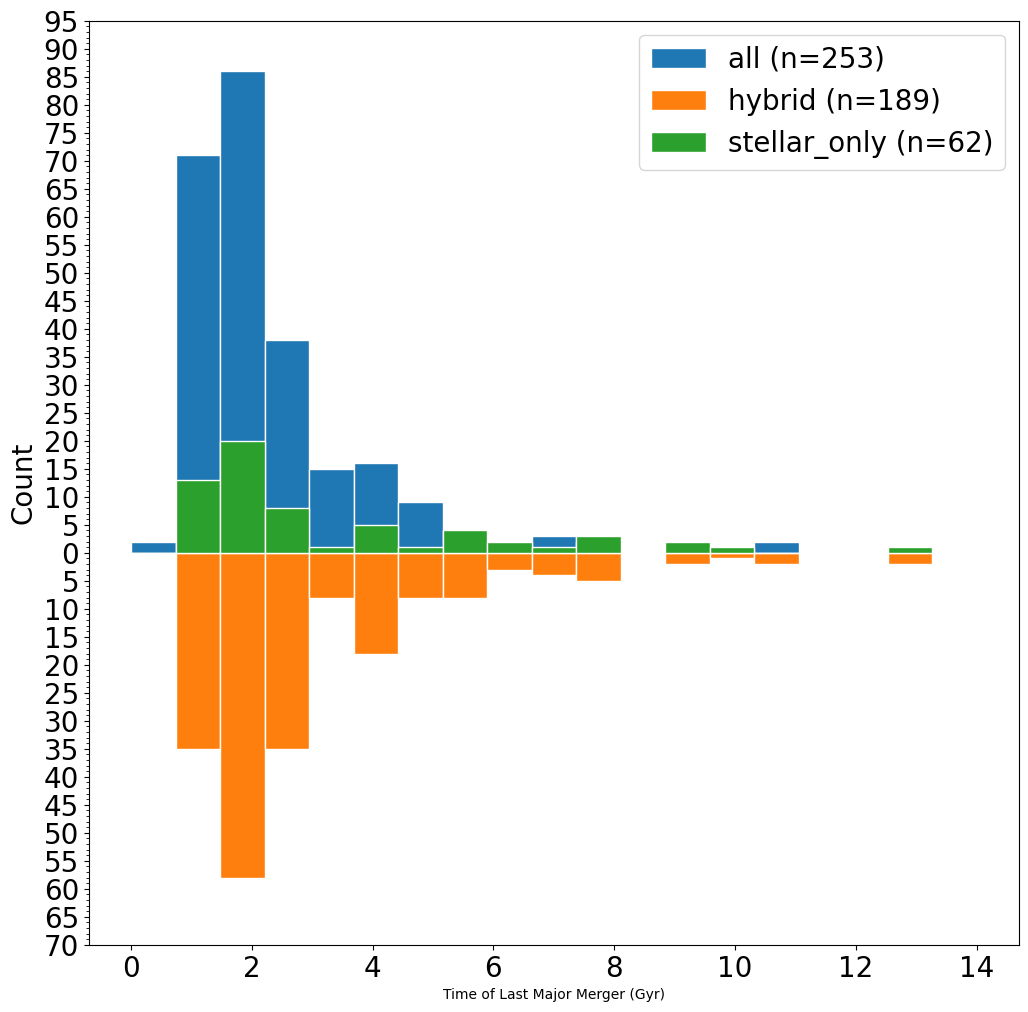

In [8]:
#create histograms of time of last major mergers for all simulations and all halos
import numpy as np
import matplotlib.pyplot as plt

def plot_hist_last_major_mergers(all_merger_histories,type='stellar_only'):
    #calculate the time of last major merger for each halo
    major_mergers = {}
    
    #consider 3 different requirements for a major merger:
    #1. stellar only
    #2. include everything, stars and dark matter
    #3. hybrid, for halos that are dark at z=0, use everything, otherwise use stellar only

    
    if type == 'stellar_only':
        merger_string = 'merger_ratio_stellar_only'
    elif type == 'all':
        merger_string = 'merger_ratio'
    elif type == 'hybrid':
        merger_string = 'merger_ratio'
    nhalos = 0

    for sim in all_merger_histories.keys():
        major_mergers[sim] = {}
        steps = sorted(all_merger_histories[sim].keys(), reverse=True)
        for halo in all_merger_histories[sim][steps[0]].keys():
            nhalos += 1
            halo_0 = halo
            #is halo dark?
            halo_dark = all_merger_histories[sim][steps[0]][halo]['final_state']['n_star'] == 0
            ratios = []
            times = []
            #loop through time steps to find the most recent major merger
            for step in steps:
                #print('\t',sim,step,halo,all_merger_histories[sim][step][halo]['merger_info']['main_progenitor'])
                if all_merger_histories[sim][step][halo]['merger_info'][merger_string]:
                    #if all_merger_histories[sim][step][halo]['merger_info'][merger_string] < 4:
                        if (type == 'stellar_only') or (type == 'all'):
                            times.append(all_merger_histories[sim][step][halo]['final_state']['time'])
                            ratios.append(all_merger_histories[sim][step][halo]['merger_info'][merger_string])
                            
                        if type == 'hybrid':
                            if halo_dark:
                                times.append(all_merger_histories[sim][step][halo]['final_state']['time'])
                                ratios.append(all_merger_histories[sim][step][halo]['merger_info'][merger_string])                             
                            else:
                                merger_ratio_stellar = all_merger_histories[sim][step][halo]['merger_info']['merger_ratio_stellar_only']
                                if merger_ratio_stellar:
                                    #if merger_ratio_stellar < 4:
                                        times.append(all_merger_histories[sim][step][halo]['final_state']['time'])
                                        ratios.append(merger_ratio_stellar)
                                             
                halo = all_merger_histories[sim][step][halo]['merger_info']['main_progenitor']
                if halo == None:
                    break
            if len(ratios) > 0:
                major_mergers[sim][str(halo_0)] = {'ratios': ratios, 'times': times}
    print(f'Number of halos: {nhalos}')
    print(major_mergers['cptmarvel']['3'])
    #save to pickle file 
    with open(f'../DataFiles/major_mergers_{type}.pkl', 'wb') as f:
        print(f'saving major mergers to {f}')
        pickle.dump(major_mergers, f)
        
        
    last_major_mergers = []
    for sim in major_mergers.keys():
        for halo in major_mergers[sim].keys():
            #print(sim,halo,major_mergers[sim][halo]['time'][0])
            #print(major_mergers[sim][halo]['time'])
            last_major_mergers.append(major_mergers[sim][halo]['times'][-1])
    
    return last_major_mergers
    
    
types = ['all','hybrid','stellar_only']


#plot histogram
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

#fix bins and bin range
bins = np.linspace(0, 14, 20)
ax.set_xlabel('Time of Last Major Merger (Gyr)')
ax.set_ylabel('Number of Halos')
for type in types:
    last_major_mergers = plot_hist_last_major_mergers(all_merger_histories,type)
    
    n_total = len(last_major_mergers)
    hist_values, bin_edges = np.histogram(
                last_major_mergers,
                bins=bins,
                density=False
            )
    # For the second mask, make the counts negative
    if type == 'hybrid':
        hist_values = -hist_values

    ax.bar(bin_edges[:-1],
           hist_values,
           width=np.diff(bin_edges),
           alpha=1,
           # color=color,
           edgecolor='white',
           label=f"{type} (n={n_total})",
           linewidth=1,
           align='edge'
           )
    #ax.set_yscale('symlog')
    ax.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
    yticks = ax.get_yticks()


    # Set labels showing absolute values but maintain position
    yticks = [int(tick) for tick in yticks]
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(abs(int(tick))) for tick in yticks])

    ax.tick_params(labelsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.legend(fontsize = 20)
    
    

In [91]:
last_major_mergers

[3.869786474911925,
 5.584800745683497,
 3.8697864749278645,
 6.12074270540492,
 9.33639446330919,
 2.154772204155597,
 13.195176572796413,
 1.618830244543644,
 0.9756998930109543,
 2.261960596076191,
 1.2972650687762897,
 2.583525771852629,
 4.834482002292368,
 1.618830244543644,
 8.371698935987348,
 9.979524814939943,
 0.9756998930057655,
 5.477612353952037,
 2.9050909476521642,
 2.9050909476521642]

In [96]:
all_merger_histories['cptmarvel'][4096][20]

{'final_state': {'mvir': np.float64(624260004.6409842),
  'm_star': np.float64(0.0),
  'snapshot': 4096,
  'time': 13.731118532104414,
  'n_star': np.int64(0)},
 'merger_info': {'has_merger': False,
  'dark_merger': None,
  'merger_ratio': None,
  'merger_ratio_stellar_only': None,
  'main_progenitor': 19,
  'main_progenitor_mvir': np.float64(483346000.0),
  'minor_stellar_mvir': 0,
  'total_minor_mvir': 0,
  'progenitors': [],
  'dark_progenitors': [],
  'rejected_minor_progenitors': [],
  'rejected_dark_progenitors': [],
  'contribution_threshold': 50.0},
 'progenitor_details': {'stellar': {11: {'matching_particles': 10530,
    'percent_in_final': 11.234396671289876,
    'percent_of_progenitor': 2.852375354176712,
    'Mvir': np.float64(1785320000.0),
    'n_star': np.int64(1954),
    'npart': np.int64(369166),
    'total_particles': 369166}},
  'dark': {19: {'matching_particles': 90117,
    'percent_in_final': 96.14531099967994,
    'percent_of_progenitor': 90.64181611530763,
    'M

How to store information about the merger history of a halo? 
halo_id at z=0 as row index
times (snapshots as colums)
each cell contains a dictionary with the following keys:


In [269]:
#get time of last major merger for each halo
last_major_mergers = {}
for halo in major_mergers.keys():
    last_major_mergers[halo] = major_mergers[halo]['times'][-1]
    

In [270]:
last_major_mergers

{2: 3.869786474911925, 3: 5.1560471779798815, 149: 5.1560471779798815}

In [285]:
history_df[4096][1196]

{'final_state': {'mvir': np.float64(5206363.345251479),
  'm_star': np.float64(3916.6705995646803),
  'snapshot': 4096,
  'time': 13.731118532104414,
  'n_star': np.int64(15)},
 'merger_info': {'has_merger': False,
  'merger_ratio': None,
  'merger_ratio_stellar_only': None,
  'merger_ratio_with_dark': None,
  'main_progenitor': 5,
  'main_progenitor_mvir': np.float64(5439430000.0),
  'total_stellar_mvir': np.float64(5439430000.0),
  'total_dark_mvir': 0,
  'progenitors': [],
  'dark_progenitors': [],
  'rejected_minor_progenitors': [],
  'rejected_dark_progenitors': [],
  'contribution_threshold': 50.0},
 'progenitor_details': {'stellar': {5: {'matching_particles': 796,
    'percent_in_final': 100.0,
    'percent_of_progenitor': 0.06465825351234031,
    'Mvir': np.float64(5439430000.0),
    'n_star': np.int64(45498),
    'total_particles': 1231088}},
  'dark': {}}}

In [283]:
#find all splits in history_df
splits = {}
for halo in history_df[4096].keys():
    halo_0 = halo
    for step in steps:
        try:
            progenitor_details_stellar = history_df[step][halo]['progenitor_details']['stellar']
        except:
            progenitor_details_stellar = None
        try:
            progenitor_details_dark = history_df[step][halo]['progenitor_details']['dark']
        except:
            progenitor_details_dark = None
        halo = history_df[step][halo]['merger_info']['main_progenitor']
        if progenitor_details_stellar:
            for progenitor in progenitor_details_stellar.keys():
                try:
                    if progenitor_details_stellar[progenitor]['match_type'] == 'split':
                        splits[halo_0] = {'split_step': step, 'split_progenitor': progenitor}
                except:
                    continue
        if progenitor_details_dark:
            for progenitor in progenitor_details_dark.keys():
                try:
                    if progenitor_details_dark[progenitor]['match_type'] == 'split':
                        splits[halo_0] = {'split_step': step, 'split_progenitor': progenitor}
                except:
                    continue
        



In [284]:
print(splits)

{149: {'split_step': 4096, 'split_progenitor': 3}, 407: {'split_step': 4096, 'split_progenitor': 1}}
